# SECTION 1:
* LOAD MERGED DATASET: this has already been checked for misssing values,duplicates and negative values in the ETL page.

In [15]:
# import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import plotly.express as px # visualization
import matplotlib.pyplot as plt # plotting

In [16]:
df_merged = pd.read_csv('merged_dataset.csv')
df_merged.head()

,Country,Year,Estimated Cases,Estimated Deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,Reported Cases,Reported Deaths,Malaria Incidence,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,161778.0,10.0,27.07,Eastern Mediterranean
1,Algeria,2017,0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,0.0,0.00,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,3874892.0,13967.0,228.91,Africa
3,Argentina,2017,0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,1.0,0.00,Americas
4,Armenia,2017,0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,1.0,0.00,Europe


# SECTION 2:
* DESCRIPTIVE ANALYSIS; to understand the malaria trends across multiple countries

***MALARIA TREND OVER TIME***

In [19]:


# Ensure correct data types
df_merged['Year'] = pd.to_numeric(df_merged['Year'], errors='coerce').astype('Int64')
df_merged['Estimated Cases'] = pd.to_numeric(df_merged['Estimated Cases'], errors='coerce')
df_merged['Reported Cases'] = pd.to_numeric(df_merged['Reported Cases'], errors='coerce')
df_merged.head()



,Country,Year,Estimated Cases,Estimated Deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,Reported Cases,Reported Deaths,Malaria Incidence,WHO Region
0,Afghanistan,2017,NaN,298[110-510],630308,495000.0,801000.0,298,110.0,510.0,161778.0,10.0,27.07,Eastern Mediterranean
1,Algeria,2017,0.0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,0.0,0.00,Africa
2,Angola,2017,NaN,13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,3874892.0,13967.0,228.91,Africa
3,Argentina,2017,0.0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,1.0,0.00,Americas
4,Armenia,2017,0.0,0,0,498000.0,1389000.0,0,390.0,3565.0,0.0,1.0,0.00,Europe


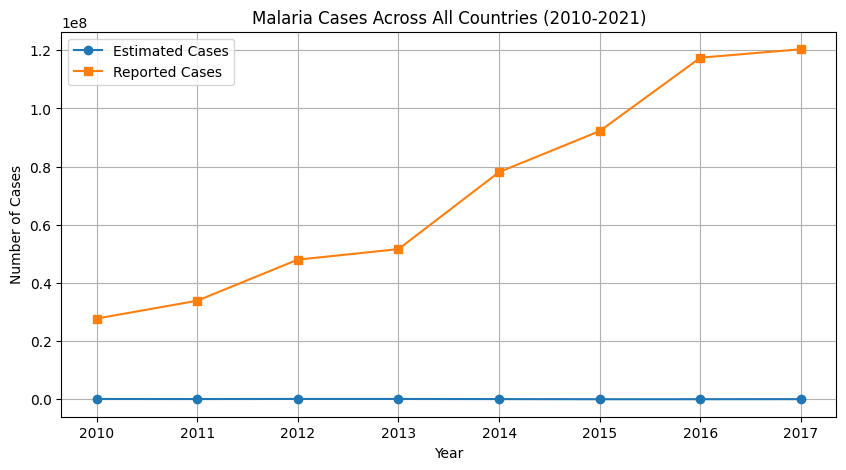

In [20]:
# Yearly malaria cases  (2010-2021)

yearly_cases = df_merged.groupby('Year')[['Estimated Cases', 'Reported Cases']].sum()

plt.figure(figsize=(10,5))
plt.plot(yearly_cases.index, yearly_cases['Estimated Cases'], marker='o', label="Estimated Cases")
plt.plot(yearly_cases.index, yearly_cases['Reported Cases'], marker='s', label="Reported Cases")
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('Malaria Cases Across All Countries (2010-2021)')
plt.legend()
plt.grid(True)
plt.show()
